<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/InteligenciaNegocios/TP4/TP4_FelipeMejias_MariaMora_InteligenciaNegocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligencia de Negocios
# Trabajo práctico 4

- Professor: Lorena Zuñiga

- Students:  
    - María Mora Cross, Instituto Tecnológico de Costa Rica.
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- March 03th, 2020

## **1-) Instalación de arules y arulesViz**

In [0]:
# Install necessary libraries
install.packages("arules")
install.packages("arulesViz")
install.packages("skimr")

# **2-) Importar bibliotecas necesarias para la ejecución de la TP4**

In [0]:
library(arules)
library(arulesViz)
library(tidyverse)
library(plyr)
library(ggplot2)
library(knitr)
library(lubridate)
library(RColorBrewer)
library(skimr)

# **3-) Entendimiento del negocio**

**Objetivo de negocio:**

Descubrir características que podrían llevar a una persona a ganar tener ingresos superiores a $50mil

**Objetivo de minería de datos:**

Descubrir reglas de interés que permitan asociar características con el hecho de ganar más de $50mil.

**Criterio de éxito:**
*   Lograr reglas con una confianza mayor al 85%.



# **4-) Entendimiento de los datos**

**4.1   Recolección de datos iniciales.**







In [121]:
# CSV File Path
CSV_FILE_PATH<- 'https://raw.githubusercontent.com/fmejias/CienciasDeLosDatosTEC/master/InteligenciaNegocios/TP4/AdultosUSA.csv'

# This function is in charge of reading a CSV file and create a DataFrame
load_csv_file_to_dataframe <- function(csv_file_path) {
  data_frame<- read.csv(CSV_FILE_PATH,sep=';',dec=',',stringsAsFactors = TRUE)
  return(data_frame)
}

# This function is in charge of showing the complete DataFrame table
show_dataframe_information <- function(data_frame) {
  # Show complete DataFrame
  cat("- Los datos de las primeras 20 filas del data frame son: \n\n")
  ##data_frame
  head(data_frame, n = 20)
}

# Load CSV file to create a DataFrame with USA Adults Info
usa_adults_data_frame<- load_csv_file_to_dataframe(CSV_FILE_PATH)

# Show USA Adults DataFrame
cat("A continuación se va a mostrar el DataFrame de Adultos de USA:", "\n\n")
show_dataframe_information(usa_adults_data_frame)

A continuación se va a mostrar el DataFrame de Adultos de USA: 

- Los datos de las primeras 20 filas del data frame son: 



,Edad,TipoTrabajo,NivelEducativo,AnnosEducacion,EstadoCivil,Ocupacion,Sexo,HorasSemanales,PaisOrigen,Ingresos
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Male,40,United-States,<=50K.
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Male,13,United-States,<=50K.
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Male,40,United-States,<=50K.
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Male,40,United-States,<=50K.
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Female,40,Cuba,<=50K.
6,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Female,40,United-States,<=50K.
7,49,Private,9th,5,Married-spouse-absent,Other-service,Female,16,Jamaica,<=50K.
8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Male,45,United-States,>50K.
9,31,Private,Masters,14,Never-married,Prof-specialty,Female,50,United-States,>50K.


**4.2   Exploración de los datos.**







In [122]:
# This function is in charge of showing a summary of the DataFrame
show_dataframe_summary <- function(data_frame) {
  cat("\n- Un resumen con datos estadísticos del data frame es: \n\n")
  skim(data_frame)
}

# Show USA Adults DataFrame
cat("A continuación se va a mostrar información estadística importante sobre el DataFrame de Adultos de USA:", "\n\n")
show_dataframe_summary(usa_adults_data_frame)

A continuación se va a mostrar información estadística importante sobre el DataFrame de Adultos de USA: 


- Un resumen con datos estadísticos del data frame es: 

── Data Summary ────────────────────────
                           Values    
Name                       data_frame
Number of rows             25000     
Number of columns          10        
_______________________              
Column type frequency:               
  factor                   7         
  numeric                  3         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate ordered n_unique
1 TipoTrabajo            0             1 FALSE          9
2 NivelEducativo         0             1 FALSE         16
3 EstadoCivil            0             1 FALSE          7
4 Ocupacion              0             1 FALSE         15
5 Sexo                   0             1 FA

**4.3   Verificación de la calidad de los datos**







Luego de analizar las estadísticas de los datos, se observa que no aparecen datos incompletos. Sin embargo, hay columnas que tienen como valor el signo de interrogación **?**, por lo que estas filas se consideran que tienen datos faltantes y por tanto se debe aplicar una limpieza sobre estas.

# **5-) Preparación de los datos**

**5.1   Selección de los datos**







In [0]:
# TODO

**5.2   Limpieza de los datos**







In [123]:
# Rows with missing data are deleted
delete_rows_with_missing_data <- function(data_frame) {
  data_frame[data_frame=="?"] <- NA
  data_frame <- na.omit(data_frame)
  return(data_frame)
}

# Remove rows with missing data
usa_adults_data_frame <- delete_rows_with_missing_data(usa_adults_data_frame)

# Show DataFrame without missing data rows
show_dataframe_information(usa_adults_data_frame)

- Los datos de las primeras 20 filas del data frame son: 



,Edad,TipoTrabajo,NivelEducativo,AnnosEducacion,EstadoCivil,Ocupacion,Sexo,HorasSemanales,PaisOrigen,Ingresos
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Male,40,United-States,<=50K.
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Male,13,United-States,<=50K.
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Male,40,United-States,<=50K.
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Male,40,United-States,<=50K.
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Female,40,Cuba,<=50K.
6,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Female,40,United-States,<=50K.
7,49,Private,9th,5,Married-spouse-absent,Other-service,Female,16,Jamaica,<=50K.
8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Male,45,United-States,>50K.
9,31,Private,Masters,14,Never-married,Prof-specialty,Female,50,United-States,>50K.


**5.3   Construcción de nuevos datos**







In [0]:
# TODO

**5.4   Transformaciones aplicadas a los datos**







In [0]:
# Transform numeric data to factor
transform_numeric_column_to_factor_column <- function(data_frame) {
  data_frame$Edad<- as.factor(data_frame$Edad)
  data_frame$HorasSemanales<- as.factor(data_frame$HorasSemanales)
  data_frame$AnnosEducacion<- as.factor(data_frame$AnnosEducacion)
  return(data_frame)
}

# Transform dataframe to transaction format
transform_dataframe_to_transaction_format <- function(data_frame) {
  transaction_format_dataframe<- as(data_frame, "transactions")
  return(transaction_format_dataframe)
}

# Transform Edad, HorasSemanales and AnnosEducacion columns
usa_adults_data_frame<- transform_numeric_column_to_factor_column(usa_adults_data_frame)

# Show DataFrame with numeric data as factors
show_dataframe_information(usa_adults_data_frame)

# Transform DataFrame to Transaction Format
usa_adults_data_frame_transaction_format<- transform_dataframe_to_transaction_format(usa_adults_data_frame)

# Show DataFrame as TransactionFormat
cat("\n\nSummary of Transaction Format DataFrame: \n\n")
summary(usa_adults_data_frame_transaction_format)


# **6-) Fase de modelado**

**6.1   Selección de técnicas**







Se va a utilizar el Algoritmo A priori.

**6.2   Construcción del modelo**







**6.2.1   Selección de los parámetros**







In [0]:
# Parameters values selection
SUPPORT<- 0.001
CONFIDENCE<- 0.85
MAXLEN<- 8 # This value represents the maximum number of items

**6.2.2   Ejecución**







In [155]:
# Rules generator
apriori_rules_generator <- function(data_frame_transaction_format) {
  rules<- apriori(data_frame_transaction_format,parameter = list(supp=SUPPORT,conf=CONFIDENCE,maxlen=MAXLEN),
                  appearance = list(default="lhs",rhs='Ingresos=>50K.'))
  return(rules)
}

# Generate rules
apriori_rules<- apriori_rules_generator(usa_adults_data_frame_transaction_format)

# Show rules summary
cat("\n\n\n- Show rules summary: \n\n")
summary(apriori_rules)

# Remove redundant rules
subsets<- which(colSums(is.subset(apriori_rules,apriori_rules))>1)
final_apriori_rules<- apriori_rules[-subsets]

# Show top 10 final rules
cat("\n\n- Show top 10 final rules: \n\n")
inspect(final_apriori_rules[1:10])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.85    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      8  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 23 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[271 item(s), 23171 transaction(s)] done [0.02s].
sorting and recoding items ... [191 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8

Warning message in apriori(data_frame_transaction_format, parameter = list(supp = SUPPORT, :
“Mining stopped (maxlen reached). Only patterns up to a length of 8 returned!”


 done [0.29s].
writing ... [626 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].



- Show rules summary: 



set of 626 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6   7   8 
  8  70 172 212 128  36 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.783   7.000   8.000 

summary of quality measures:
    support           confidence          lift           count       
 Min.   :0.001036   Min.   :0.8500   Min.   :3.437   Min.   : 24.00  
 1st Qu.:0.001295   1st Qu.:0.8653   1st Qu.:3.499   1st Qu.: 30.00  
 Median :0.001640   Median :0.8864   Median :3.584   Median : 38.00  
 Mean   :0.002225   Mean   :0.8979   Mean   :3.631   Mean   : 51.55  
 3rd Qu.:0.002287   3rd Qu.:0.9282   3rd Qu.:3.754   3rd Qu.: 53.00  
 Max.   :0.009797   Max.   :1.0000   Max.   :4.044   Max.   :227.00  

mining info:
                          data ntransactions support confidence
 data_frame_transaction_format         23171   0.001       0.85



- Show top 10 final rules: 

     lhs                                 rhs                  support confidence     lift count
[1]  {NivelEducativo=Doctorate,                                                                
      Ocupacion=Exec-managerial}      => {Ingresos=>50K.} 0.001683138  0.8863636 3.584281    39
[2]  {AnnosEducacion=16,                                                                       
      Ocupacion=Exec-managerial}      => {Ingresos=>50K.} 0.001683138  0.8863636 3.584281    39
[3]  {TipoTrabajo=Self-emp-inc,                                                                
      AnnosEducacion=15}              => {Ingresos=>50K.} 0.002244185  0.9454545 3.823233    52
[4]  {AnnosEducacion=15,                                                                       
      HorasSemanales=45}              => {Ingresos=>50K.} 0.001165250  0.9310345 3.764921    27
[5]  {TipoTrabajo=Self-emp-inc,                                                                
      Niv

**6.2.3   Descripción de los modelos obtenidos**







La descripción de los modelos obtenidos es la siguiente: 



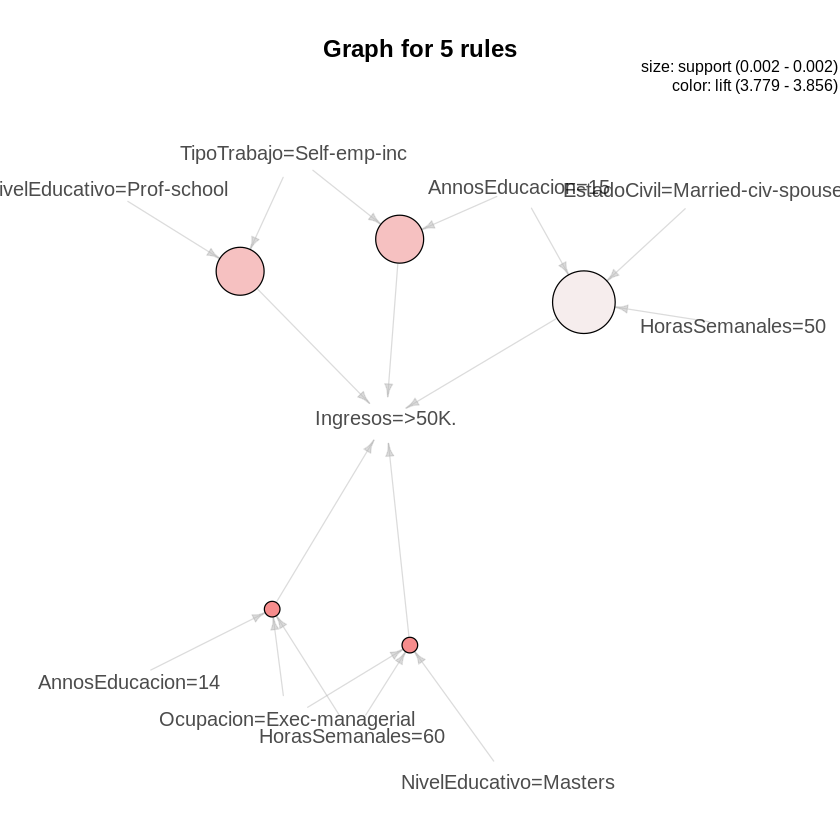

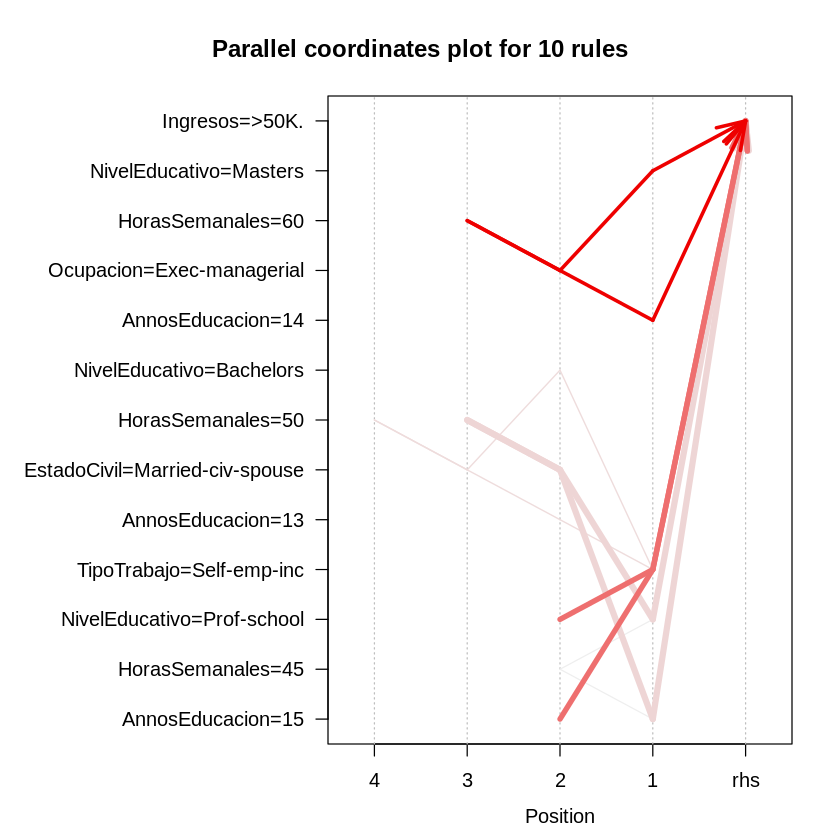

In [158]:
cat("La descripción de los modelos obtenidos es la siguiente: \n\n")

# Filter rules with superior confidence of 0.85
best_rules<- final_apriori_rules[quality(final_apriori_rules)$confidence>0.85]

# Select best five rules
best_five_rules<- head(best_rules, n=5, by='confidence')

# Plot best five rules  
plot(best_five_rules,method = 'graph')

# Plot 10 individual rules
top_ten_rules<-head(best_rules,n=10,by='confidence')
plot(top_ten_rules,method ='paracoord')

**6.3   Evaluación de los modelos**







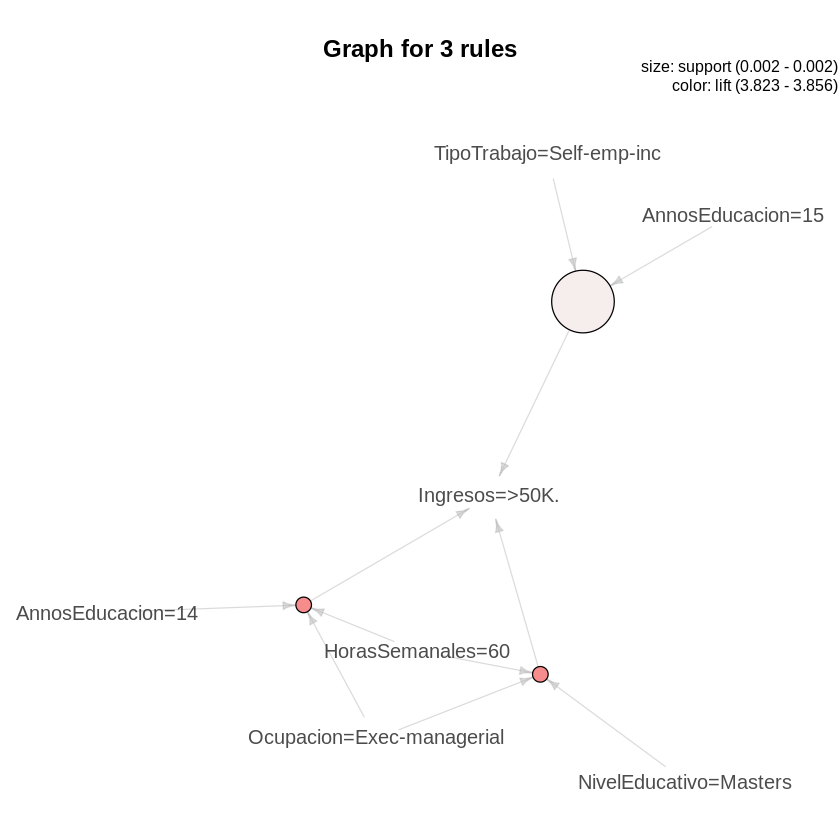

In [159]:
# Select best 3 rules
best_three_rules<- head(best_rules, n=3, by='confidence')

# Plot best 3 rules  
plot(best_three_rules,method = 'graph')